In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from graphviz import Digraph

def trace(rootValue):
    nodes, edges = set(), set()
    def build(value):
        if value not in nodes:
            nodes.add(value)
            for term in value._terms:
                edges.add((term, value))
                build(term)
    build(rootValue)
    return nodes, edges

def draw_dot(rootValue, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(rootValue)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f }" % (n._label, n.data), shape='record')
        if n._op != 'prim':
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [6]:
class Value:
    """ 
        stores a single scalar value and its gradient
    """
    def __init__(self, data: float, _terms=(), _op='prim', _label="?"):
        """ 
        data: a float or integer
        _terms: terms this value combines, starting with self
        _op: operation by how the terms are combined
        _label: label for self
        """
        self.data = data
        # internal variables used for micrograd graph construction
        self._terms = set(_terms)
        self._op = _op # the op that produced this node, for graphviz / debugging / etc
        self._label = _label

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        return out
        
    def __repr__(self):
        return f"Value(data={self.data}, op={self._op}, label={self._label})"

term d consists of the terms {Value(data=10.0, op=prim, label=c), Value(data=-6.0, op=*, label=?)}
term d prints as Value(data=4.0, op=+, label=d)


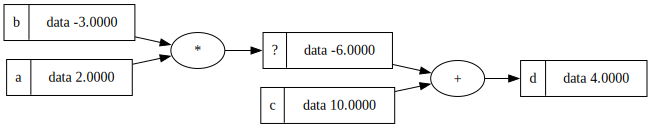

In [7]:
a = Value(2.0, _label ='a')
b = Value(-3.0, _label ='b')
c = Value(10.0, _label ='c')
d=a*b + c
d._label='d'
print('term d consists of the terms', d._terms)
print('term d prints as', d)
draw_dot(d)